In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import pickle
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df = pd.DataFrame(cancer.data ,columns =cancer.feature_names)
print(df.shape)
df.head()

(569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
#scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

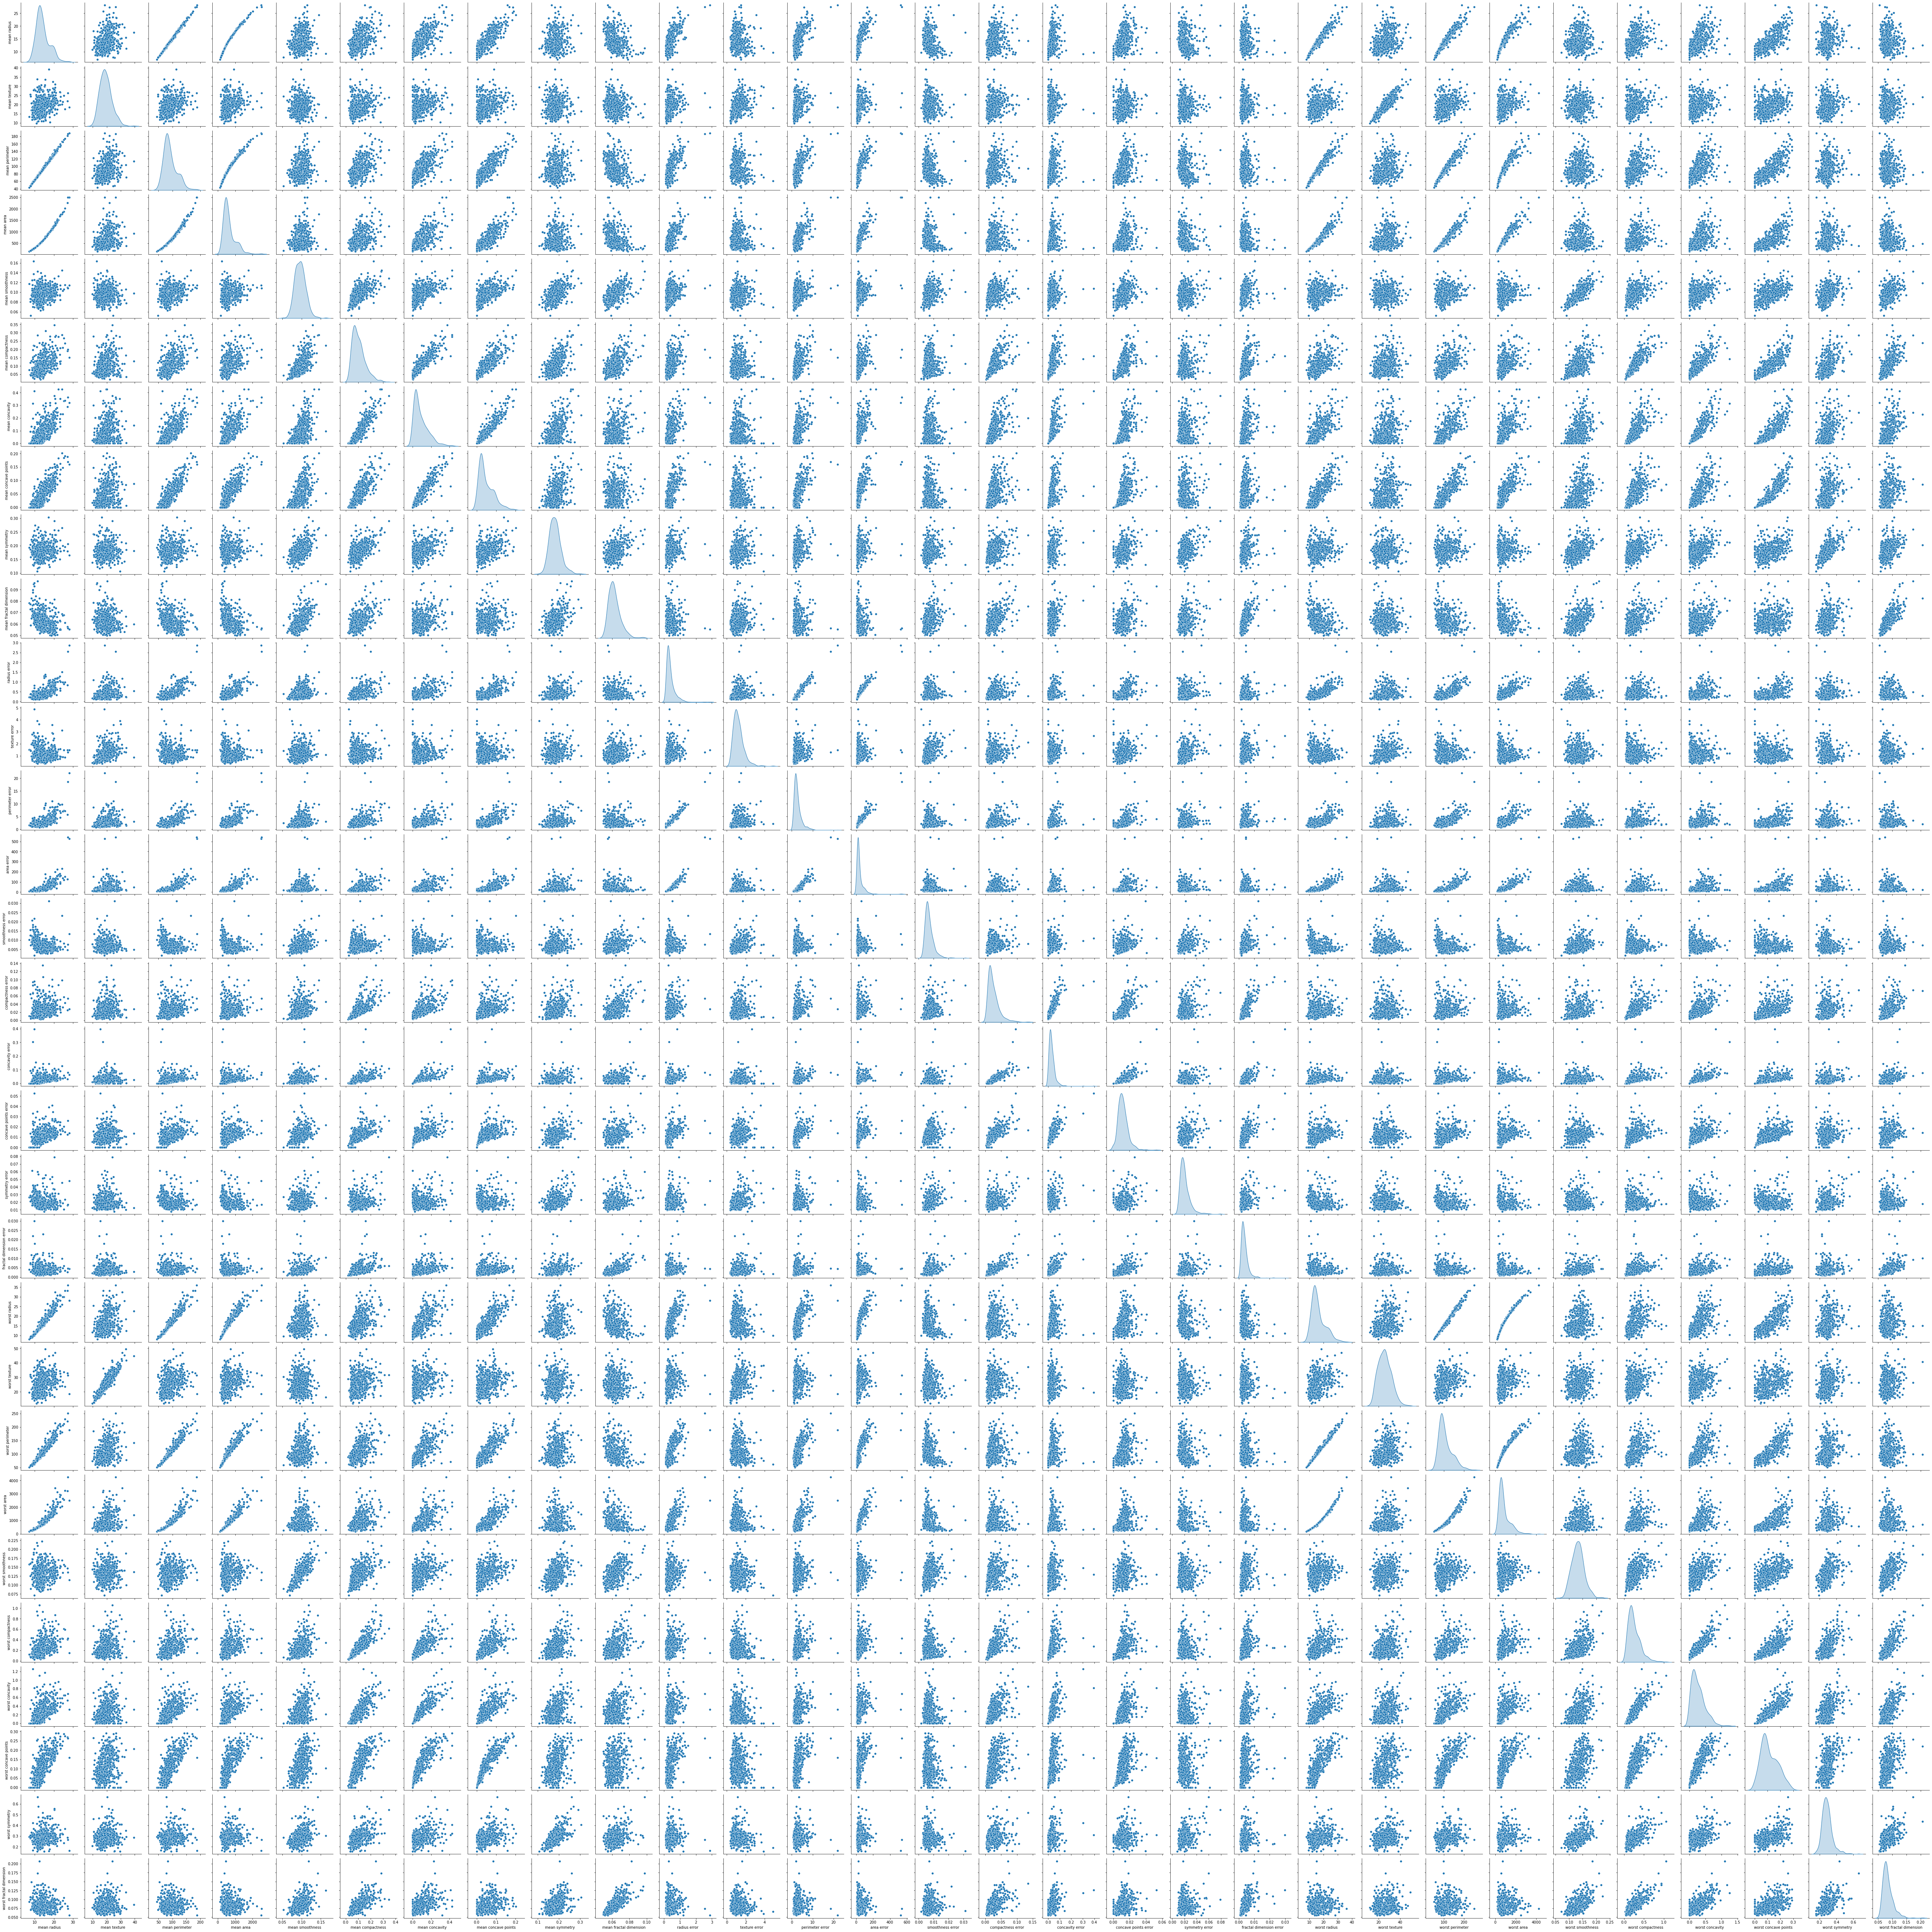

In [8]:
import seaborn as sns
sns.pairplot(df,diag_kind = "kde")

In [9]:
# kmeans clustering  in an iteration 1 till 20 cluster size
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

num_clusters  cluster_errors
0              1    17070.000000
1              2    11595.526607
2              3    10061.797818
3              4     9333.178651
4              5     8564.399278
5              6     7967.418472
6              7     7538.677392
7              8     7146.869508
8              9     6854.709112
9             10     6623.581173
10            11     6389.223773
11            12     6228.240049
12            13     6052.291325
13            14     5884.932296
14            15     5801.449185
15            16     5629.588819
16            17     5473.100544
17            18     5391.237172
18            19     5269.433103

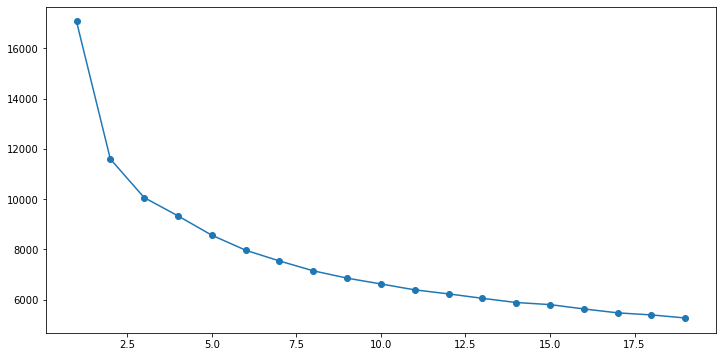

In [10]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2,random_state=100).fit(X_scaled)
kmeans

#centroids and labels

centroids = kmeans.cluster_centers_
print(centroids)

print('\n')

label = kmeans.labels_
print(label)

[[-0.48442497 -0.23948977 -0.50066826 -0.47922799 -0.30302374 -0.50766196
  -0.56671617 -0.57922637 -0.30396101 -0.12545115 -0.4270387  -0.02125791
  -0.42787555 -0.40142988 -0.00848542 -0.34569618 -0.31677152 -0.38607654
  -0.06982168 -0.20642387 -0.51730476 -0.25182285 -0.53018015 -0.49893721
  -0.3025456  -0.47291642 -0.51940106 -0.57008917 -0.29713594 -0.30959659]
 [ 0.97397614  0.48151381  1.0066346   0.96352718  0.60925407  1.020696
   1.13942935  1.16458212  0.61113855  0.25222982  0.85859633  0.04274078
   0.86027888  0.8071077   0.01706063  0.69505052  0.63689512  0.77623856
   0.14038222  0.41503212  1.04008365  0.50631048  1.06597067  1.00315418
   0.60829274  0.95083725  1.04429844  1.14621103  0.59741617  0.62246932]]


[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0

In [12]:
new_df = pd.concat([df,pd.Series(label,name = "Target")],axis =1)
new_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Target  
0          0.4601                  0.11890       1  
1          0.2750                  0.08902       1  
2          0.3613                  0.08758       1  
3          0.6638                  0.17300       1  
4          0.2364                  0.07678       1  

[5 rows x 31 columns]

In [13]:
#importing libraries for logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Logistics Regression
from sklearn.metrics import accuracy_score, confusion_matrix # Evaluation for Model

In [14]:
X = new_df.drop(['Target'],axis =1)
y = new_df.Target

In [15]:
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int32

In [17]:

#Model Building
lg = LogisticRegression()
model = lg.fit(X,y)
model

#find predictions
predictions = lg.predict(X)

#accuracy score for evaluation
print("accuracy score is ",accuracy_score(predictions,y))

accuracy score is  0.9560632688927944


C:\Users\vharsheny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#finding confusion matrix
cf = confusion_matrix(y, predictions)
cf

array([[371,   9],
       [ 16, 173]], dtype=int64)

In [19]:
#Classification_report

from sklearn.metrics import classification_report
class_report = classification_report(y,predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       380
           1       0.95      0.92      0.93       189

    accuracy                           0.96       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



In [20]:
#Data plit into Train and Test :

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 100)

print("x_train shape is ",x_train.shape)
print("x_test shape is ",x_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

x_train shape is  (455, 30)
x_test shape is  (114, 30)
y_train shape is  (455,)
y_test shape is  (114,)


In [21]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# For evaluating our ML results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

# Dataset Import
import statsmodels.api as sm

In [22]:
# Packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# For evaluating our ML results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

# Dataset Import
import statsmodels.api as sm

# Logistic Regression

In [23]:

#Model Building
lg = LogisticRegression()
model_1 = lg.fit(x_train,y_train)
model_1

#find predictions
predictions_1 = lg.predict(x_test)

#accuracy score for evaluation
#print("accuracy score is ",accuracy_score(y_test,predictions_1))

lg_score_train = lg.score(x_train,y_train)
print("Train Prediction Score",lg_score_train*100)
lg_score_test = accuracy_score(y_test,predictions_1)
print("Test Prediction Score",lg_score_test*100)

#finding confusion matrix
cf1 = confusion_matrix(y_test, predictions_1)
cf1



Train Prediction Score 96.26373626373626
Test Prediction Score 98.24561403508771


C:\Users\vharsheny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[69,  1],
       [ 1, 43]], dtype=int64)

In [24]:
#KFOlD cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True ,random_state = 100)
acc = []
for train,test in kf.split(X,y):
    M = LogisticRegression()
    Xtrain,Xtest = x_train,x_test
    Ytrain,Ytest = y_train,y_test
    M.fit(Xtrain,Ytrain)
    Y_predict = M.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print("Cross validation score : %.3f%% " %np.mean(acc))

C:\Users\vharsheny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vharsheny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Cross validation score : 0.982% 


C:\Users\vharsheny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [25]:
svc = SVC(kernel = 'linear',random_state = 100,probability=True)
svc.fit(x_train,y_train)

y_pred_svc= svc.predict(x_test)

svc_score_train = svc.score(x_train,y_train)
print("Train Prediction Score",svc_score_train*100)
svc_score_test = accuracy_score(y_test,y_pred_svc)
print("Test Prediction Score",svc_score_test*100)

#finding confusion matrix
cf1 = confusion_matrix(y_test,y_pred_svc)
cf1

Train Prediction Score 96.48351648351648
Test Prediction Score 99.12280701754386


array([[69,  1],
       [ 0, 44]], dtype=int64)

# Decision Tree

## GINI

In [26]:
# GridSearchCV

param_grid={'max_depth':range(1,15,2) ,
            'max_features':range(1,15,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(x_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 3, 'max_features': 7}
Accuracy : 0.9603864734299516


In [27]:
# Fitting Logistic Regression to the Training set
dt = DecisionTreeClassifier(max_depth=5,max_features=13,random_state = 100)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=13, random_state=100)

In [28]:

y_pred_dt= dt.predict(x_test)

#Score of Prediction
dt_score_train = dt.score(x_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

#finding confusion matrix
cf2 = confusion_matrix(y_test,y_pred_dt)
cf2

Train Prediction Score 99.34065934065934
Test Prediction Score 97.36842105263158


array([[68,  2],
       [ 1, 43]], dtype=int64)

## Entropy

In [29]:
# GridSearchCV

param_grid={'max_depth':range(1,15,2) ,
            'max_features':range(1,15,2)}
dt_g=DecisionTreeClassifier(criterion='entropy',random_state = 100)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(x_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 3, 'max_features': 7}
Accuracy : 0.9584541062801932


In [30]:
# Fitting Logistic Regression to the Training set
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=13,random_state = 100)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=13,
                       random_state=100)

In [31]:
y_pred_dt= dt.predict(x_test)

#Score of Prediction
dt_score_train = dt.score(x_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

#finding confusion matrix
cf2 = confusion_matrix(y_test,y_pred_dt)
cf2

Train Prediction Score 99.56043956043956
Test Prediction Score 97.36842105263158


array([[68,  2],
       [ 1, 43]], dtype=int64)

# Random forest

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(1,15,2),
            'n_estimators':[125,250],
            'max_features':range(1,15,2)}
dt_g=RandomForestClassifier(random_state=100)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(x_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [ ]:
rf = RandomForestClassifier(max_depth=5,max_features=3,n_estimators=250,random_state=100)
rf.fit(x_train,y_train)

In [ ]:
y_pred_rf= dt.predict(x_test)

In [ ]:
#Score of Prediction
rf_score_train = rf.score(x_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_rf)

# Naive bayes

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)

In [ ]:
y_pred_nb= nb.predict(x_test)

In [ ]:
nb_score_train = nb.score(x_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

In [ ]:
confusion_matrix(y_test, y_pred_nb)

# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

In [ ]:
y_pred_knn= knn.predict(x_test)

In [ ]:
knn_score_train = knn.score(x_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction Score",knn_score_test*100)

In [ ]:
confusion_matrix(y_test, y_pred_knn)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

In [ ]:
classifiers = [ 
    LogisticRegression(),
    DecisionTreeClassifier(criterion='gini'),
    DecisionTreeClassifier(criterion='entropy'),
    DecisionTreeRegressor(),
    SVC(kernel="rbf",probability=True),
    SVC(kernel='linear',probability=True),
    SVC(kernel='poly',probability=True), 
    SVC(kernel='sigmoid',probability=True),
    GaussianNB(),
    BernoulliNB(),
    KNeighborsClassifier(12),
    KMeans(n_clusters=6,init='random',algorithm='full' ,random_state=0),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    #XGBClassifier(), 
]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)